# Application Question

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [1]:
# read in the csv data file using Pandas
# !/usr/bin/env python

# Import Libraries
# ------------------------------------------------------------------------------------------------------------------- #;
import emcee
import corner
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, minimize

from IPython.display import display, Math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.style.use('seaborn')
# ------------------------------------------------------------------------------------------------------------------- #

cep = pd.read_csv("Cepheids.csv")
print(cep.columns)

ModuleNotFoundError: No module named 'emcee'

In [4]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

NameError: name 'cep' is not defined

In [3]:
cep

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.819330,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.734970,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.214420,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.646310,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.688390,F,LMC,14.34215,0.565524,0.647
...,...,...,...,...,...,...,...,...
7264,OGLE-SMC-CEP-4622,1.404808,-73.269361,1,SMC,15.94460,0.141140,0.648
7265,OGLE-SMC-CEP-4624,1.406767,-74.192639,1,SMC,15.29565,0.102449,0.577
7266,OGLE-SMC-CEP-4625,1.407181,-72.936056,1,SMC,15.33725,0.074740,0.485
7267,OGLE-SMC-CEP-4627,1.413575,-72.599167,1,SMC,14.06670,0.501477,0.686


## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

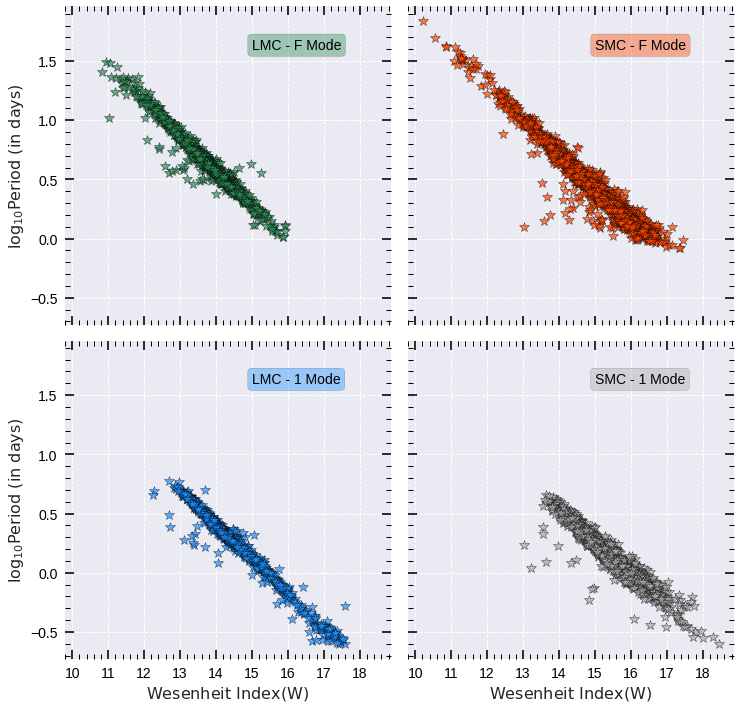

In [4]:
# YOUR CODE HERE

# Function
# ------------------------------------------------------------------------------------------------------------------- #

def set_plotparams(ax_obj, xticks=(50, 5), yticks=(1, 0.1), grid=True, fs=14, ms=1.5):
    """
    Sets plot parameters to the axes object 'ax_obj'.
    Args:
        ax_obj      : Axes object to be used for plotting and setting plot parameters
        xticks      : X-Axis Major and Minor tick intervals
        yticks      : Y-Axis Major and Minor tick intervals
        grid        : Boolean stating whether to enable Grid in the plot
        fs          : Font of the labels in the legend
        ms          : Scaled marker size to be used in the legend
    Returns:
    """
    if grid:
        ax_obj.grid(True, which='major', ls='--', lw=1)

    ax_obj.xaxis.set_ticks_position('both')
    ax_obj.yaxis.set_ticks_position('both')
    ax_obj.xaxis.set_major_locator(MultipleLocator(xticks[0]))
    ax_obj.xaxis.set_minor_locator(MultipleLocator(xticks[1]))
    ax_obj.yaxis.set_major_locator(MultipleLocator(yticks[0]))
    ax_obj.yaxis.set_minor_locator(MultipleLocator(yticks[1]))
    ax_obj.tick_params(axis='both', which='major', direction='in', width=1.6, length=9, color='k', 
                       labelcolor='k', labelsize=fs)
    ax_obj.tick_params(axis='both', which='minor', direction='in', width=1.0, length=5, color='k', 
                       labelcolor='k', labelsize=fs)
# ------------------------------------------------------------------------------------------------------------------- #

# Code for Plotting
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12,12))

ax1.plot(lmcf['W'], lmcf['logP1'], ls='', mfc='seagreen', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax2.plot(smcf['W'], smcf['logP1'], ls='', mfc='orangered', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax3.plot(lmco['W'], lmco['logP1'], ls='', mfc='dodgerblue', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax4.plot(smco['W'], smco['logP1'], ls='', mfc='darkgrey', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')

set_plotparams(ax1, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4, xticks=(1, 0.2), yticks=(0.5, 0.1))

ax1.text(x=15, y=1.6, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(x=15, y=1.6, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(x=15, y=1.6, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(x=15, y=1.6, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax3.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax4.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax1.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)
ax3.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #


## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

Fit Results:
LMC (F Mode): 
 Slope: -0.29 +/- 0.00 
 Intercept: 4.62 +/- 0.00
SMC (F Mode): 
 Slope: -0.28 +/- 0.00 
 Intercept: 4.57 +/- 0.00
LMC (1 Mode): 
 Slope: -0.28 +/- 0.00 
 Intercept: 4.37 +/- 0.00
SMC (1 Mode): 
 Slope: -0.25 +/- 0.00 
 Intercept: 4.07 +/- 0.00


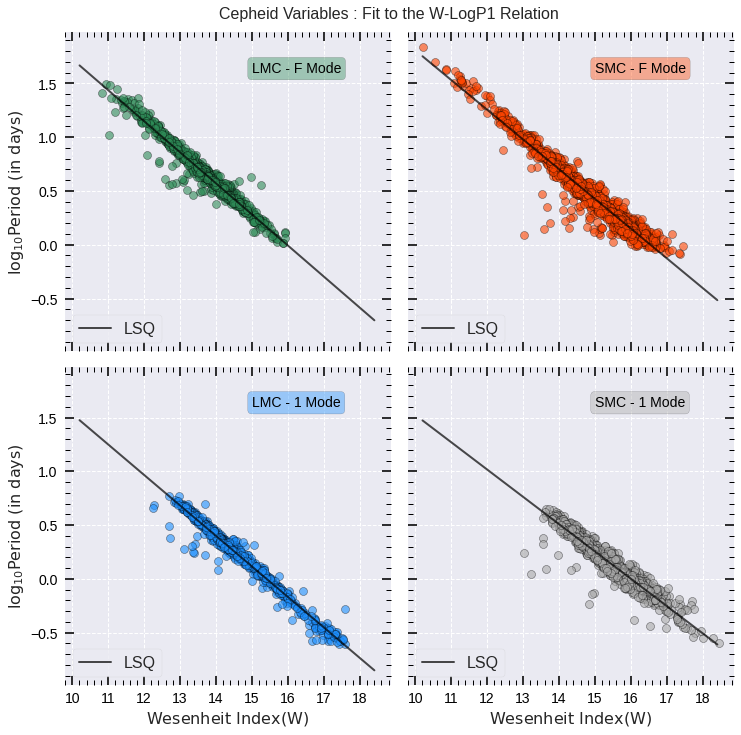

In [36]:
# YOUR CODE HERE

# Least Squares Fit
# ------------------------------------------------------------------------------------------------------------------- #
def line(x, m, c):
    return m * x + c

slope_guess = 0.25
intercept_guess = 5

opt1, cov1 = curve_fit(line, lmcf['W'], lmcf['logP1'], p0=[slope_guess, intercept_guess])
opt2, cov2 = curve_fit(line, smcf['W'], smcf['logP1'], p0=[slope_guess, intercept_guess])
opt3, cov3 = curve_fit(line, lmco['W'], lmco['logP1'], p0=[slope_guess, intercept_guess])
opt4, cov4 = curve_fit(line, smco['W'], smco['logP1'], p0=[slope_guess, intercept_guess])

print("Fit Results:")
print("LMC (F Mode): \n Slope: {0:.2f} +/- {2:.2f} \n Intercept: {1:.2f} +/- {3:.2f}".format(*opt1, *np.diag(cov1)))
print("SMC (F Mode): \n Slope: {0:.2f} +/- {2:.2f} \n Intercept: {1:.2f} +/- {3:.2f}".format(*opt2, *np.diag(cov2)))
print("LMC (1 Mode): \n Slope: {0:.2f} +/- {2:.2f} \n Intercept: {1:.2f} +/- {3:.2f}".format(*opt3, *np.diag(cov3)))
print("SMC (1 Mode): \n Slope: {0:.2f} +/- {2:.2f} \n Intercept: {1:.2f} +/- {3:.2f}".format(*opt4, *np.diag(cov4)))
# ------------------------------------------------------------------------------------------------------------------- #


# Check the Least Square Fit in the Plots
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12,12))


ax1.plot(lmcf['W'], lmcf['logP1'], ls='', mfc='seagreen', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax2.plot(smcf['W'], smcf['logP1'], ls='', mfc='orangered', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax3.plot(lmco['W'], lmco['logP1'], ls='', mfc='dodgerblue', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax4.plot(smco['W'], smco['logP1'], ls='', mfc='darkgrey', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')

xarr = np.arange(np.min(cep['W']), np.max(cep['W']), 0.1)

ax1.plot(xarr, line(xarr, *opt1), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax2.plot(xarr, line(xarr, *opt2), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax3.plot(xarr, line(xarr, *opt3), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax4.plot(xarr, line(xarr, *opt4), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')

set_plotparams(ax1, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4, xticks=(1, 0.2), yticks=(0.5, 0.1))


ax1.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax2.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax3.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax4.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)

ax1.text(x=15, y=1.6, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(x=15, y=1.6, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(x=15, y=1.6, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(x=15, y=1.6, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax3.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax4.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax1.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)
ax3.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #


Maximum likelihood estimates:
LMC (F Mode):
 m = -0.291, c = 4.638, logf = -23.555
SMC (F Mode):
 m = -0.250, c = 4.143, logf = -3.886
LMC (1 Mode):
 m = -0.270, c = 4.175, logf = -10.834
SMC (1 Mode):
 m = -0.205, c = 3.277, logf = -10.850


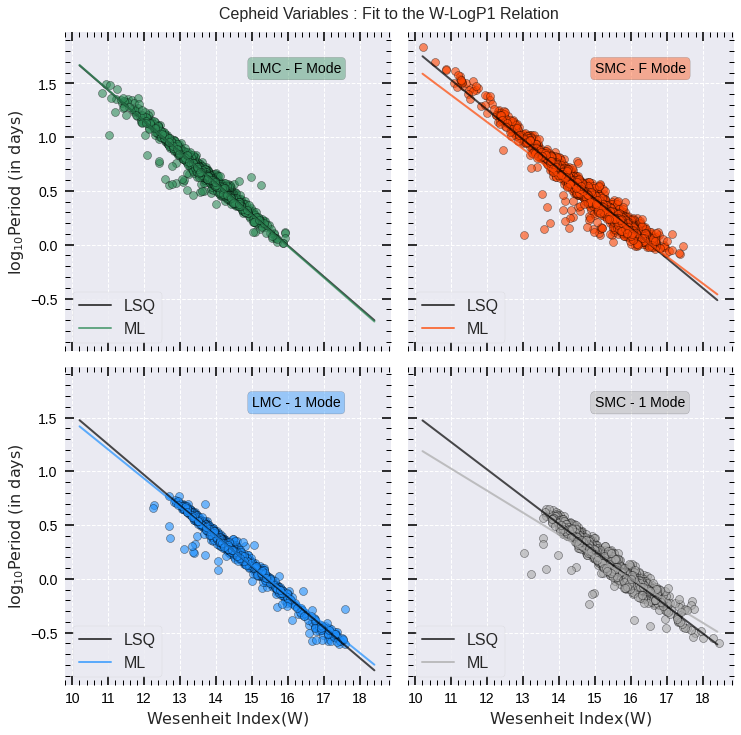

In [48]:
# YOUR CODE HERE

# Maximum LikeliHood Fit
# ------------------------------------------------------------------------------------------------------------------- #

def modelfunc(x, params):
    m, c, logf = params
    return m * x + c

def log_likelihood(params, x, y, yerr):
    m, c, logf = params
    model = modelfunc(x, params)
    var = (yerr ** 2) + np.exp(2 * logf)
    return -0.5 * np.sum(((y - model) ** 2) / var + np.log(var))

def log_prior(params):
    m, c, logf = params
    if -1.0 < m < 1 and -10 < c < 10.0 and -100.0 < logf < 100.0:
        return 0.0
    return -np.inf

def log_probability(params, x, y, yerr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, x, y, yerr)

f_guess = 0.1
n = lambda *args: -log_likelihood(*args)
initial = np.array([slope_guess, intercept_guess, np.log(f_guess)])
soln1 = minimize(n, initial, args=(lmcf['W'], lmcf['logP1'], np.sqrt(np.abs(lmcf['logP1']))))
soln2 = minimize(n, initial, args=(smcf['W'], smcf['logP1'], np.sqrt(np.abs(smcf['logP1']))))
soln3 = minimize(n, initial, args=(lmco['W'], lmco['logP1'], np.sqrt(np.abs(lmco['logP1']))))
soln4 = minimize(n, initial, args=(smco['W'], smco['logP1'], np.sqrt(np.abs(smco['logP1']))))

m1_ml, c1_ml, logf1_ml = soln1.x
m2_ml, c2_ml, logf2_ml = soln2.x
m3_ml, c3_ml, logf3_ml = soln3.x
m4_ml, c4_ml, logf4_ml = soln4.x

print("Maximum likelihood estimates:")
print("LMC (F Mode):\n m = {0:.3f}, c = {1:.3f}, logf = {2:.3f}".format(m1_ml, c1_ml, logf1_ml))
print("SMC (F Mode):\n m = {0:.3f}, c = {1:.3f}, logf = {2:.3f}".format(m2_ml, c2_ml, logf2_ml))
print("LMC (1 Mode):\n m = {0:.3f}, c = {1:.3f}, logf = {2:.3f}".format(m3_ml, c3_ml, logf3_ml))
print("SMC (1 Mode):\n m = {0:.3f}, c = {1:.3f}, logf = {2:.3f}".format(m4_ml, c4_ml, logf4_ml))

# ------------------------------------------------------------------------------------------------------------------- #


# Check the Least Square Fit & Maximum Likelihood Fit in the Plots
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12,12))

ax1.plot(lmcf['W'], lmcf['logP1'], ls='', mfc='seagreen', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax2.plot(smcf['W'], smcf['logP1'], ls='', mfc='orangered', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax3.plot(lmco['W'], lmco['logP1'], ls='', mfc='dodgerblue', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax4.plot(smco['W'], smco['logP1'], ls='', mfc='darkgrey', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')

xarr = np.arange(np.min(cep['W']), np.max(cep['W']), 0.1)

ax1.plot(xarr, line(xarr, *opt1), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax2.plot(xarr, line(xarr, *opt2), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax3.plot(xarr, line(xarr, *opt3), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax4.plot(xarr, line(xarr, *opt4), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')

ax1.plot(xarr, line(xarr, m1_ml, c1_ml), ls='-', lw=2, c='seagreen', alpha=0.7, marker='', label='ML')
ax2.plot(xarr, line(xarr, m2_ml, c2_ml), ls='-', lw=2, c='orangered', alpha=0.7, marker='', label='ML')
ax3.plot(xarr, line(xarr, m3_ml, c3_ml), ls='-', lw=2, c='dodgerblue', alpha=0.7, marker='', label='ML')
ax4.plot(xarr, line(xarr, m4_ml, c4_ml), ls='-', lw=2, c='darkgrey', alpha=0.7, marker='', label='ML')

set_plotparams(ax1, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4, xticks=(1, 0.2), yticks=(0.5, 0.1))

ax1.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax2.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax3.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax4.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)

ax1.text(x=15, y=1.6, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(x=15, y=1.6, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(x=15, y=1.6, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(x=15, y=1.6, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax3.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax4.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax1.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)
ax3.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #

In [43]:

# Emcee Fit
# ------------------------------------------------------------------------------------------------------------------- #
pos1 = soln1.x + 1e-4 * np.random.randn(40, 3)
pos2 = soln2.x + 1e-4 * np.random.randn(40, 3)
pos3 = soln3.x + 1e-4 * np.random.randn(40, 3)
pos4 = soln4.x + 1e-4 * np.random.randn(40, 3)

nwalkers1, ndim1 = pos1.shape
nwalkers2, ndim2 = pos2.shape
nwalkers3, ndim3 = pos3.shape
nwalkers4, ndim4 = pos4.shape

sampler1 = emcee.EnsembleSampler(nwalkers1, ndim1, log_probability, args=(lmcf['W'], lmcf['logP1'], np.sqrt(np.abs(lmcf['logP1']))))
sampler2 = emcee.EnsembleSampler(nwalkers2, ndim2, log_probability, args=(smcf['W'], smcf['logP1'], np.sqrt(np.abs(smcf['logP1']))))
sampler3 = emcee.EnsembleSampler(nwalkers3, ndim3, log_probability, args=(lmco['W'], lmco['logP1'], np.sqrt(np.abs(lmco['logP1']))))
sampler4 = emcee.EnsembleSampler(nwalkers4, ndim4, log_probability, args=(smco['W'], smco['logP1'], np.sqrt(np.abs(smco['logP1']))))

sampler1.run_mcmc(pos1, 5000, progress=True)
sampler2.run_mcmc(pos2, 5000, progress=True)
sampler3.run_mcmc(pos3, 5000, progress=True)
sampler4.run_mcmc(pos4, 5000, progress=True)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:56<00:00, 88.63it/s]


State([[ -0.20761563   3.32311946  -6.50091996]
 [ -0.20687429   3.30954939 -64.10387495]
 [ -0.21658301   3.46560808 -80.71348096]
 [ -0.20812194   3.32906876 -23.43870985]
 [ -0.19438414   3.11334166 -29.14000267]
 [ -0.18623288   2.97895624 -54.16339412]
 [ -0.21387894   3.42022532 -74.53343724]
 [ -0.21624007   3.46236553 -26.82096179]
 [ -0.19874971   3.18423983 -60.39298908]
 [ -0.1964758    3.15250677 -79.52189652]
 [ -0.20378098   3.25660869 -92.07260313]
 [ -0.18790838   3.00011312 -37.89722273]
 [ -0.19795012   3.17283792 -23.89582003]
 [ -0.22275507   3.56321234 -66.07140492]
 [ -0.20742586   3.32285011 -86.07000764]
 [ -0.21231479   3.39910348 -91.85321733]
 [ -0.19990417   3.19727532 -18.09460248]
 [ -0.23706314   3.79076175 -41.21374172]
 [ -0.20553029   3.28249706 -71.5980722 ]
 [ -0.2214767    3.54278108 -95.86370584]
 [ -0.17945471   2.87192942 -74.67867389]
 [ -0.20414575   3.26385705  -9.5639251 ]
 [ -0.18987488   3.04562016 -57.60091199]
 [ -0.20693396   3.30835264 

In [44]:
tau1 = sampler1.get_autocorr_time()
tau2 = sampler2.get_autocorr_time()
tau3 = sampler3.get_autocorr_time()
tau4 = sampler4.get_autocorr_time()

fig1, axes1 = plt.subplots(3, figsize=(10, 7), sharex=True)
samples1 = sampler1.get_chain()
labels = ["m", "c", "log(f)"]

for i in range(ndim1):
    ax = axes1[i]
    ax.plot(samples1[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples1))
    ax.set_ylabel(labels[i])
    # ax.yaxis.set_label_coords(-0.1, 0.5)

axes1[-1].set_xlabel("step number")
plt.show()
plt.close(fig1)

fig2, axes2 = plt.subplots(3, figsize=(10, 7), sharex=True)
samples2 = sampler2.get_chain()

for i in range(ndim2):
    ax = axes2[i]
    ax.plot(samples2[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples2))
    ax.set_ylabel(labels[i])
    # ax.yaxis.set_label_coords(-0.1, 0.5)

axes2[-1].set_xlabel("step number")
plt.show()
plt.close(fig2)

fig3, axes3 = plt.subplots(3, figsize=(10, 7), sharex=True)
samples3 = sampler3.get_chain()

for i in range(ndim3):
    ax = axes3[i]
    ax.plot(samples3[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples3))
    ax.set_ylabel(labels[i])
    # ax.yaxis.set_label_coords(-0.1, 0.5)

axes3[-1].set_xlabel("step number")
plt.show()
plt.close(fig3)

fig4, axes4 = plt.subplots(3, figsize=(10, 7), sharex=True)
samples4 = sampler4.get_chain()

for i in range(ndim4):
    ax = axes4[i]
    ax.plot(samples4[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples4))
    ax.set_ylabel(labels[i])
    # ax.yaxis.set_label_coords(-0.1, 0.5)

axes4[-1].set_xlabel("step number")
plt.show()
plt.close(fig4)

print (tau1, tau2, tau3, tau4)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [ 49.86463847  49.29983901 101.12811008]

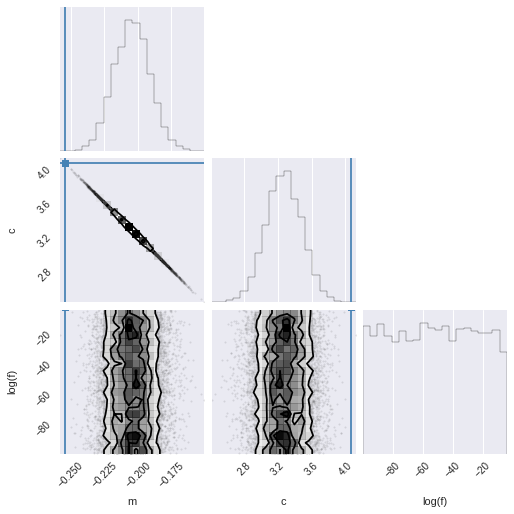

In [47]:
flatsamples1 = sampler1.get_chain(discard=100, thin=int(0.5 * tau1[0]), flat=True)
flatsamples2 = sampler2.get_chain(discard=100, thin=int(0.5 * tau2[0]), flat=True)
flatsamples3 = sampler3.get_chain(discard=100, thin=int(0.5 * tau3[0]), flat=True)
flatsamples4 = sampler4.get_chain(discard=100, thin=int(0.5 * tau4[0]), flat=True)

fig = corner.corner(flatsamples4, labels=labels, truths=[opt4[0], opt4[1], np.log(f_guess)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

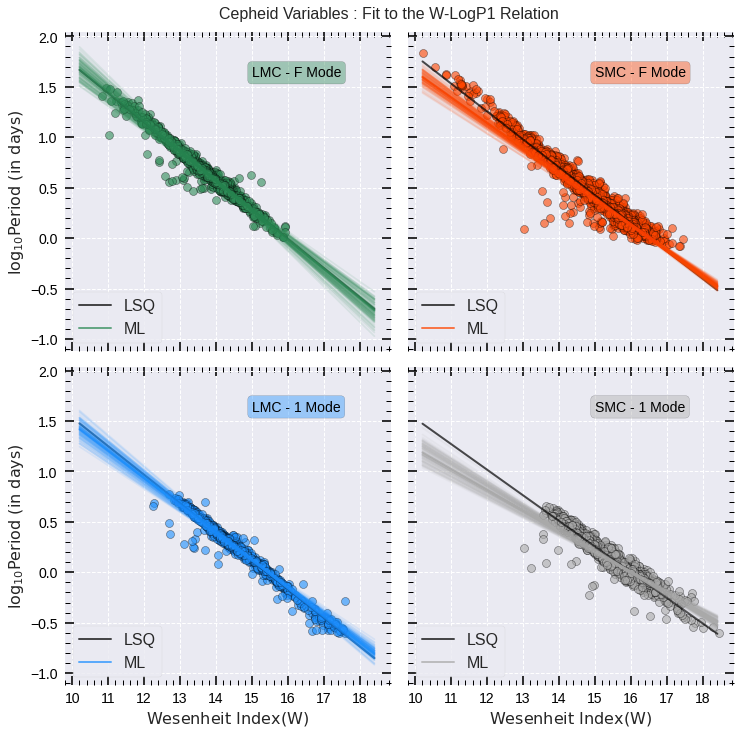

In [32]:
inds1 = np.random.randint(len(flatsamples1), size=100)
inds2 = np.random.randint(len(flatsamples2), size=100)
inds3 = np.random.randint(len(flatsamples3), size=100)
inds4 = np.random.randint(len(flatsamples4), size=100)

# Check the Least Square Fit & Maximum Likelihood & Emcee Fit in the Plots
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12,12))

ax1.plot(lmcf['W'], lmcf['logP1'], ls='', mfc='seagreen', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax2.plot(smcf['W'], smcf['logP1'], ls='', mfc='orangered', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax3.plot(lmco['W'], lmco['logP1'], ls='', mfc='dodgerblue', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')
ax4.plot(smco['W'], smco['logP1'], ls='', mfc='darkgrey', mew=0.5, c='k', alpha=0.6, ms=8, marker='o')

xarr = np.arange(np.min(cep['W']), np.max(cep['W']), 0.1)

ax1.plot(xarr, line(xarr, *opt1), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax2.plot(xarr, line(xarr, *opt2), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax3.plot(xarr, line(xarr, *opt3), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax4.plot(xarr, line(xarr, *opt4), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')

ax1.plot(xarr, line(xarr, m1_ml, c1_ml), ls='-', lw=2, c='seagreen', alpha=0.7, marker='', label='ML')
ax2.plot(xarr, line(xarr, m2_ml, c2_ml), ls='-', lw=2, c='orangered', alpha=0.7, marker='', label='ML')
ax3.plot(xarr, line(xarr, m3_ml, c3_ml), ls='-', lw=2, c='dodgerblue', alpha=0.7, marker='', label='ML')
ax4.plot(xarr, line(xarr, m4_ml, c4_ml), ls='-', lw=2, c='darkgrey', alpha=0.7, marker='', label='ML')

for ind in inds1:
    sample = flatsamples1[ind]
    ax1.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='seagreen', alpha=0.1)

for i in range(ndim1):
    mcmc = np.percentile(flatsamples1[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    
for ind in inds2:
    sample = flatsamples2[ind]
    ax2.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='orangered', alpha=0.1)

    
for i in range(ndim2):
    mcmc = np.percentile(flatsamples2[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    
for ind in inds3:
    sample = flatsamples3[ind]
    ax3.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='dodgerblue', alpha=0.1)

for i in range(ndim3):
    mcmc = np.percentile(flatsamples3[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

for ind in inds4:
    sample = flatsamples4[ind]
    ax4.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='darkgrey', alpha=0.1)


for i in range(ndim4):
    mcmc = np.percentile(flatsamples4[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

set_plotparams(ax1, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4, xticks=(1, 0.2), yticks=(0.5, 0.1))

ax1.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax2.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax3.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax4.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)

ax1.text(x=15, y=1.6, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(x=15, y=1.6, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(x=15, y=1.6, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(x=15, y=1.6, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax3.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax4.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax1.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)
ax3.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #


## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

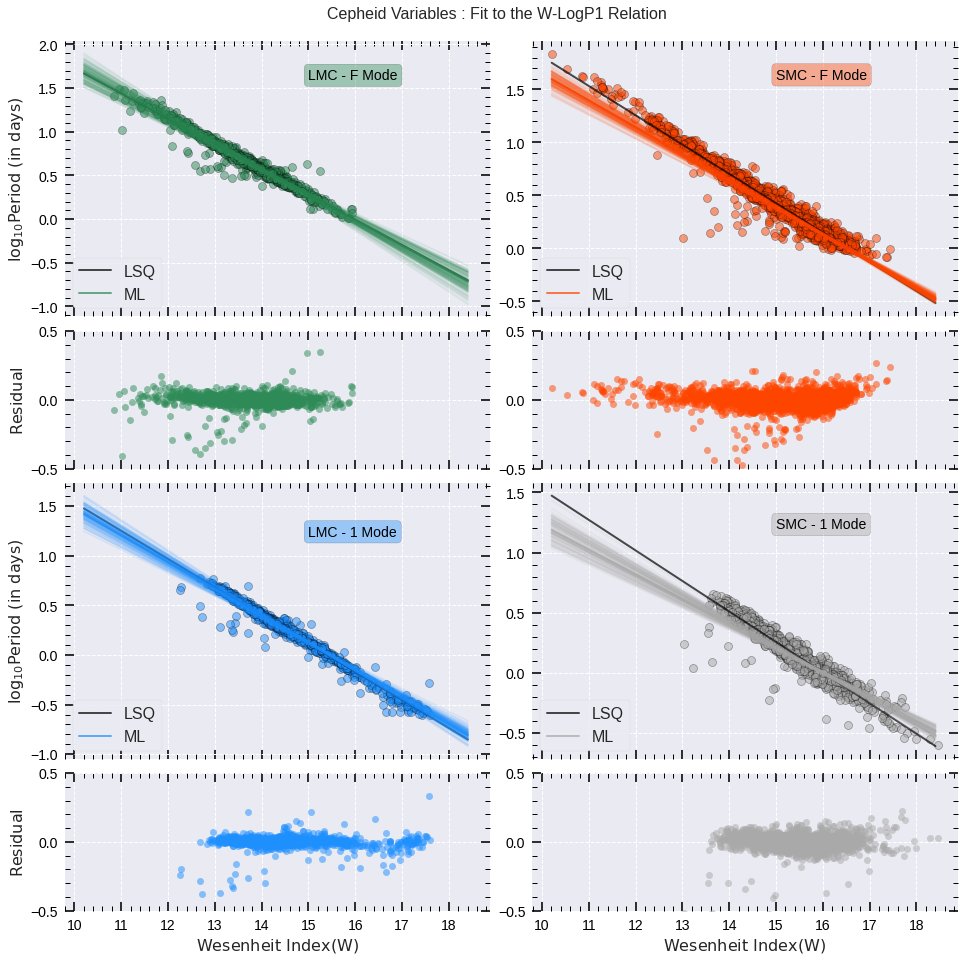

In [33]:
# YOUR CODE HERE

# Check the Least Square Fit & Maximum Likelihood & Emcee Fit in the Plots
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax1a, ax2a), (ax3, ax4), (ax3a, ax4a)) = plt.subplots(4, 2, sharex=True,
                                                                       gridspec_kw=dict(width_ratios=[1,1], height_ratios=[2,1,2,1]), 
                                                                       figsize=(16,16))

ax1.plot(lmcf['W'], lmcf['logP1'], ls='', mfc='seagreen', mew=0.5, c='k', alpha=0.5, ms=8, marker='o')
ax2.plot(smcf['W'], smcf['logP1'], ls='', mfc='orangered', mew=0.5, c='k', alpha=0.5, ms=8, marker='o')
ax3.plot(lmco['W'], lmco['logP1'], ls='', mfc='dodgerblue', mew=0.5, c='k', alpha=0.5, ms=8, marker='o')
ax4.plot(smco['W'], smco['logP1'], ls='', mfc='darkgrey', mew=0.5, c='k', alpha=0.5, ms=8, marker='o')

xarr = np.arange(np.min(cep['W']), np.max(cep['W']), 0.1)

ax1.plot(xarr, line(xarr, *opt1), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax2.plot(xarr, line(xarr, *opt2), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax3.plot(xarr, line(xarr, *opt3), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')
ax4.plot(xarr, line(xarr, *opt4), ls='-', lw=2, c='k', alpha=0.7, marker='', label='LSQ')

ax1a.plot(lmcf['W'], lmcf['logP1'] - line(lmcf['W'], *opt1), ls='', lw=2, c='seagreen', alpha=0.5, marker='o', label='LSQ')
ax2a.plot(smcf['W'], smcf['logP1'] - line(smcf['W'], *opt2), ls='', lw=2, c='orangered', alpha=0.5, marker='o', label='LSQ')
ax3a.plot(lmco['W'], lmco['logP1'] - line(lmco['W'], *opt3), ls='', lw=2, c='dodgerblue', alpha=0.5, marker='o', label='LSQ')
ax4a.plot(smco['W'], smco['logP1'] - line(smco['W'], *opt4), ls='', lw=2, c='darkgrey', alpha=0.5, marker='o', label='LSQ')

ax1.plot(xarr, line(xarr, m1_ml, c1_ml), ls='-', lw=2, c='seagreen', alpha=0.7, marker='', label='ML')
ax2.plot(xarr, line(xarr, m2_ml, c2_ml), ls='-', lw=2, c='orangered', alpha=0.7, marker='', label='ML')
ax3.plot(xarr, line(xarr, m3_ml, c3_ml), ls='-', lw=2, c='dodgerblue', alpha=0.7, marker='', label='ML')
ax4.plot(xarr, line(xarr, m4_ml, c4_ml), ls='-', lw=2, c='darkgrey', alpha=0.7, marker='', label='ML')

for ind in inds1:
    sample = flatsamples1[ind]
    ax1.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='seagreen', alpha=0.1)
    
for ind in inds2:
    sample = flatsamples2[ind]
    ax2.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='orangered', alpha=0.1)

for ind in inds3:
    sample = flatsamples3[ind]
    ax3.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='dodgerblue', alpha=0.1)

for ind in inds4:
    sample = flatsamples4[ind]
    ax4.plot(xarr, np.dot(np.vander(xarr, 2), sample[:2]), c='darkgrey', alpha=0.1)

ax1a.set_ylim(-0.5, 0.5)
ax2a.set_ylim(-0.5, 0.5)
ax3a.set_ylim(-0.5, 0.5)
ax4a.set_ylim(-0.5, 0.5)

set_plotparams(ax1, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4, xticks=(1, 0.2), yticks=(0.5, 0.1))

set_plotparams(ax1a, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax2a, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax3a, xticks=(1, 0.2), yticks=(0.5, 0.1))
set_plotparams(ax4a, xticks=(1, 0.2), yticks=(0.5, 0.1))

ax1.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax2.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax3.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)
ax4.legend(fontsize=16, markerscale=1.5, loc=3, frameon=True)

ax1.text(x=15, y=1.6, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(x=15, y=1.6, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(x=15, y=1.2, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(x=15, y=1.2, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax1a.set_ylabel(r'$\rm Residual$', fontsize=16)
ax3a.set_ylabel(r'$\rm Residual$', fontsize=16)
ax3a.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax4a.set_xlabel(r'$\rm Wesenheit\ Index (W)$', fontsize=16)
ax1.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)
ax3.set_ylabel(r'$\rm log_{10}Period\ (in\ days)$', fontsize=16)

fig.subplots_adjust(wspace=0.1, hspace=0.07)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #


## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

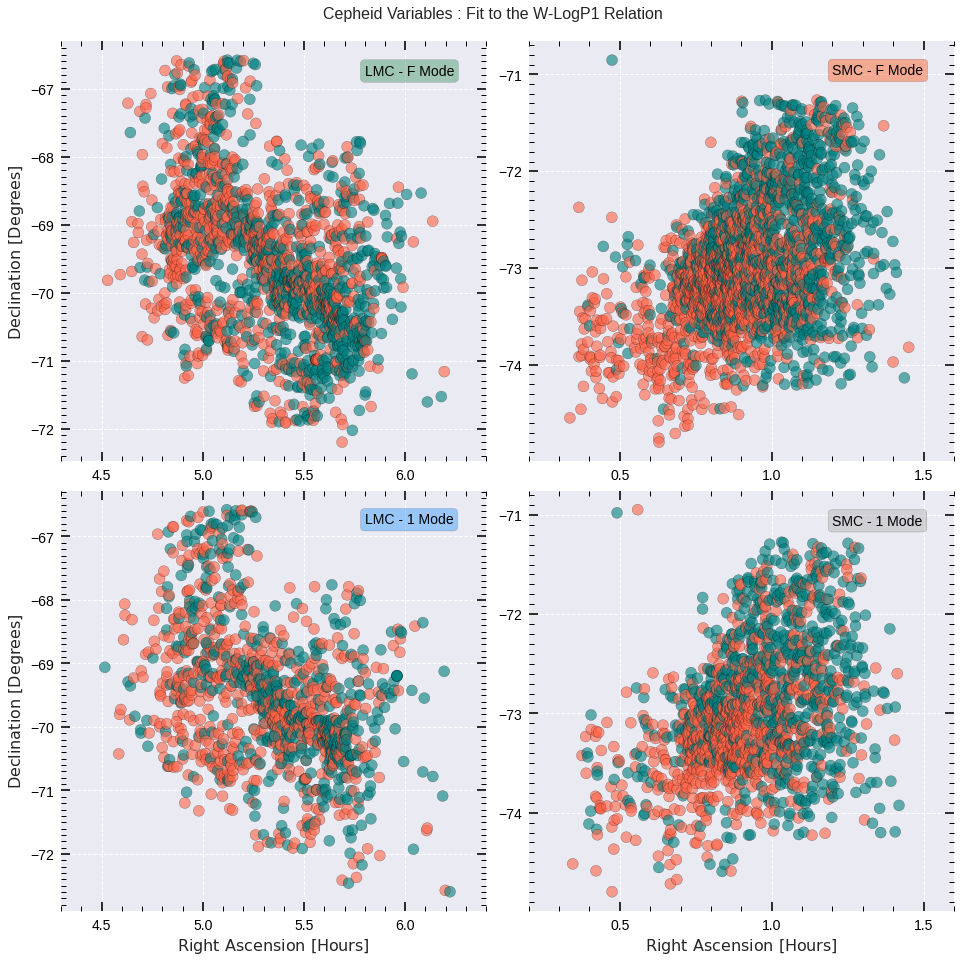

In [34]:
# YOUR CODE HERE

# Check the Scatter Plot of the Residuals in the RA, DEC AXIS
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,16))

ax1.scatter(lmcf['RA0'], lmcf['Decl0'], c=np.where((lmcf['logP1'] - line(lmcf['W'], *opt1)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax2.scatter(smcf['RA0'], smcf['Decl0'], c=np.where((smcf['logP1'] - line(smcf['W'], *opt2)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax3.scatter(lmco['RA0'], lmco['Decl0'], c=np.where((lmco['logP1'] - line(lmco['W'], *opt3)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax4.scatter(smco['RA0'], smco['Decl0'], c=np.where((smco['logP1'] - line(smco['W'], *opt4)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')

ax1.set_xlim(4.3, 6.4)
ax2.set_xlim(0.2, 1.6)
ax3.set_xlim(4.3, 6.4)
ax4.set_xlim(0.2, 1.6)

set_plotparams(ax1, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax2, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax3, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax4, xticks=(0.5, 0.1), yticks=(1, 0.1))

ax1.text(y=-66.8, x=5.8, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(y=-71, x=1.2, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(y=-66.8, x=5.8, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(y=-71.1, x=1.2, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax1.set_ylabel(r'$\rm Declination\ [Degrees]$', fontsize=16)
ax3.set_ylabel(r'$\rm Declination\ [Degrees]$', fontsize=16)
ax3.set_xlabel(r'$\rm Right\ Ascension\ [Hours]$', fontsize=16)
ax4.set_xlabel(r'$\rm Right\ Ascension\ [Hours]$', fontsize=16)

fig.subplots_adjust(wspace=0.1, hspace=0.07)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #


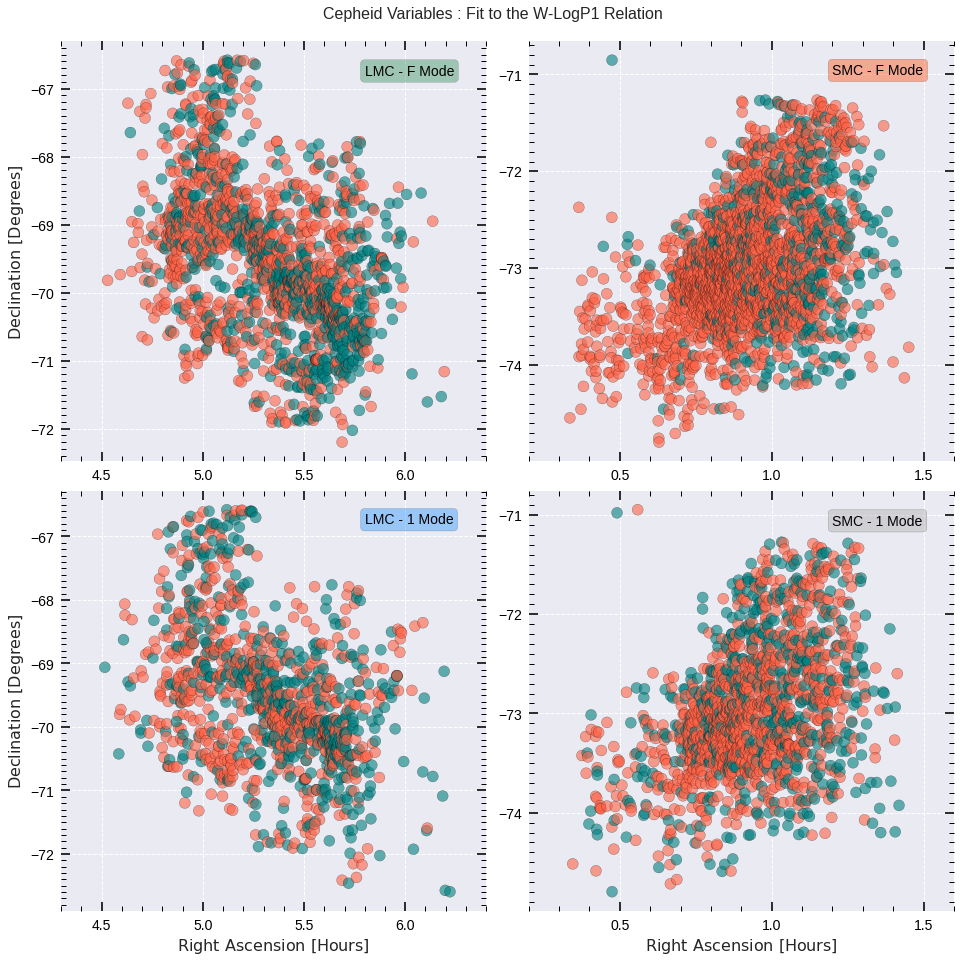

In [35]:
# YOUR CODE HERE

# Check the Scatter Plot of the Residuals in the RA, DEC AXIS
# ------------------------------------------------------------------------------------------------------------------- #
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,16))

ax1.scatter(lmcf['RA0'], lmcf['Decl0'], c=np.where((lmcf['logP1'] - line(lmcf['W'], m1_ml, c1_ml)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax2.scatter(smcf['RA0'], smcf['Decl0'], c=np.where((smcf['logP1'] - line(smcf['W'], m2_ml, c2_ml)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax3.scatter(lmco['RA0'], lmco['Decl0'], c=np.where((lmco['logP1'] - line(lmco['W'], m3_ml, c3_ml)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')
ax4.scatter(smco['RA0'], smco['Decl0'], c=np.where((smco['logP1'] - line(smco['W'], m4_ml, c4_ml)) > 0, 'tomato', 'teal'), ec='k', s=120, alpha=0.6, marker='o')

ax1.set_xlim(4.3, 6.4)
ax2.set_xlim(0.2, 1.6)
ax3.set_xlim(4.3, 6.4)
ax4.set_xlim(0.2, 1.6)

set_plotparams(ax1, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax2, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax3, xticks=(0.5, 0.1), yticks=(1, 0.1))
set_plotparams(ax4, xticks=(0.5, 0.1), yticks=(1, 0.1))

ax1.text(y=-66.8, x=5.8, s='LMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='seagreen', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax2.text(y=-71, x=1.2, s='SMC - F Mode', fontsize=14, color='k', bbox=dict(facecolor='orangered', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax3.text(y=-66.8, x=5.8, s='LMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='dodgerblue', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))
ax4.text(y=-71.1, x=1.2, s='SMC - 1 Mode', fontsize=14, color='k', bbox=dict(facecolor='darkgrey', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.4))

ax1.set_ylabel(r'$\rm Declination\ [Degrees]$', fontsize=16)
ax3.set_ylabel(r'$\rm Declination\ [Degrees]$', fontsize=16)
ax3.set_xlabel(r'$\rm Right\ Ascension\ [Hours]$', fontsize=16)
ax4.set_xlabel(r'$\rm Right\ Ascension\ [Hours]$', fontsize=16)

fig.subplots_adjust(wspace=0.1, hspace=0.07)
fig.suptitle('Cepheid Variables : Fit to the W-LogP1 Relation', fontsize=16, y=0.91)
plt.show()
plt.close(fig)
# ------------------------------------------------------------------------------------------------------------------- #
